# PCA

Analiza glavnih komponenti (_Principal Component Analysis_, PCA) je nenadgledana procedura za izgradnju novih linearno nekorelisanih atributa od postojecih. Te nove atribute zovemo glavne komponente. Prva glavna komponenta je vektor koji ima najvecu mogucu varijansu, tj. duz ovog pravca podaci najvise variraju. Svaka sledeca glavna komponenta je normalna u odnosu na sve prethodne i opet objasnjava najveci moguci preostali deo varijanse podataka.

Nakon ove transformacije mozemo da uzmemo prvih k glavnih komponenti i na taj nacin smanjimo dimenzionalnost skupa podataka, a da izgubimo sto manji deo informacija.

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
X = data['data']
y = data['target']
feature_names = data['feature_names']
class_names = data['target_names']

In [4]:
X.shape

(569, 30)

In [5]:
y.shape

(569,)

Sam PCA je nenadgledan, ali ako zelimo da primenimo neki klasifikacioni algoritam nakon njega, moramo prvo da podelimo na trening i test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [8]:
X_train.shape

(426, 30)

In [9]:
X_test.shape

(143, 30)

Preduslov za primenu PCA je da svi atributi imaju prosek 0

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.decomposition import PCA

Za argument _n_components_ mozemo da posaljemo:
- _int_ - koliko glavnih komponenti zelimo
- _float_ - koliki udeo varijanse zelimo da objasnimo

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(X_train)

PCA(n_components=2)

In [15]:
pca.components_.shape

(2, 30)

Glavne komponente su linearne kombinacije polaznih atributa i clanska promenljiva _components__ nam daje koeficijente

In [16]:
pca_names = [f'Principal_component_{i}' for i in range(pca.n_components_)]

In [17]:
for i, component in enumerate(pca.components_):
    print(f'{pca_names[i]} = ', end='')
    print(' + '.join(f'{coef:.2f}*{feature_name}'
                     for coef, feature_name in zip(component, feature_names)))
    print('-'*80)

Principal_component_0 = 0.22*mean radius + 0.09*mean texture + 0.23*mean perimeter + 0.22*mean area + 0.15*mean smoothness + 0.24*mean compactness + 0.26*mean concavity + 0.26*mean concave points + 0.14*mean symmetry + 0.06*mean fractal dimension + 0.21*radius error + 0.00*texture error + 0.21*perimeter error + 0.20*area error + 0.02*smoothness error + 0.17*compactness error + 0.15*concavity error + 0.18*concave points error + 0.04*symmetry error + 0.10*fractal dimension error + 0.23*worst radius + 0.09*worst texture + 0.24*worst perimeter + 0.23*worst area + 0.13*worst smoothness + 0.21*worst compactness + 0.23*worst concavity + 0.25*worst concave points + 0.12*worst symmetry + 0.13*worst fractal dimension
--------------------------------------------------------------------------------
Principal_component_1 = -0.23*mean radius + -0.07*mean texture + -0.22*mean perimeter + -0.23*mean area + 0.19*mean smoothness + 0.15*mean compactness + 0.06*mean concavity + -0.03*mean concave points +

Ili vizuelno

In [18]:
from matplotlib import pyplot as plt

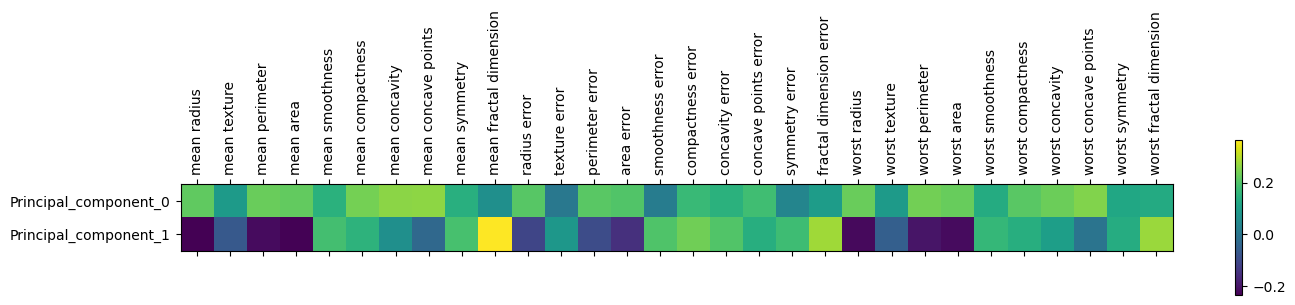

In [19]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
           labels=feature_names,
           rotation='vertical')
plt.yticks(ticks=range(pca.n_components_),
           labels=pca_names)
plt.colorbar()
plt.show()

Objasnjena varijansa svake od glavnih komponenti

In [20]:
pca.explained_variance_

array([13.1425886,  5.9362313])

Udeo objasnjene varijanse svake od glavnih komponenti

In [21]:
pca.explained_variance_ratio_

array([0.43705792, 0.19740988])

Ili vizuelno

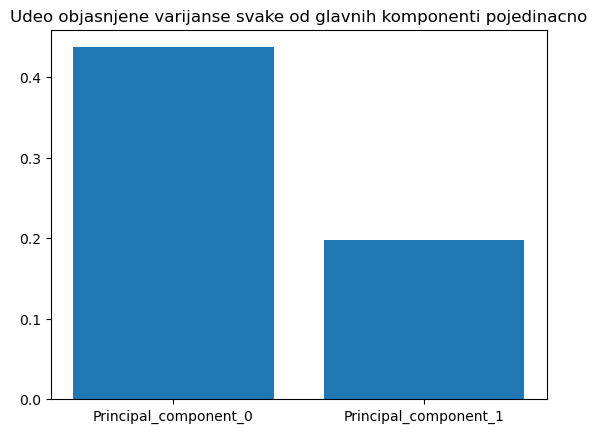

In [22]:
plt.bar(x=pca_names,
        height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse svake od glavnih komponenti pojedinacno')
plt.show()

In [23]:
import numpy as np

In [24]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

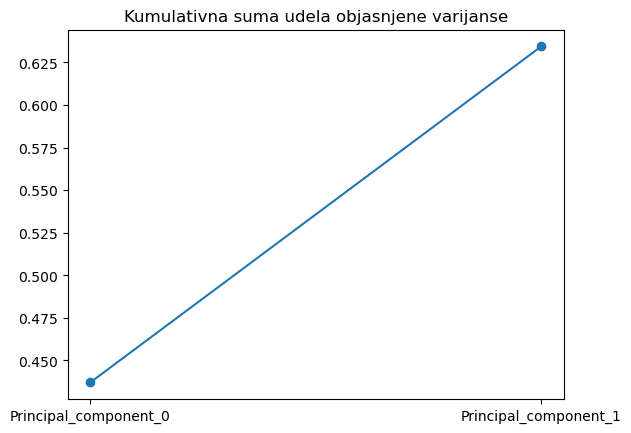

In [25]:
plt.plot(pca_names, cumulative_variance_ratio, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

Prve dve glavne komponente objasnjavaju ukupno 63% ukupne varijanse podataka

In [26]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
X_train_pca.shape

(426, 2)

Dve glavne komponente su nasi novi atributi

In [28]:
from matplotlib import pyplot as plt

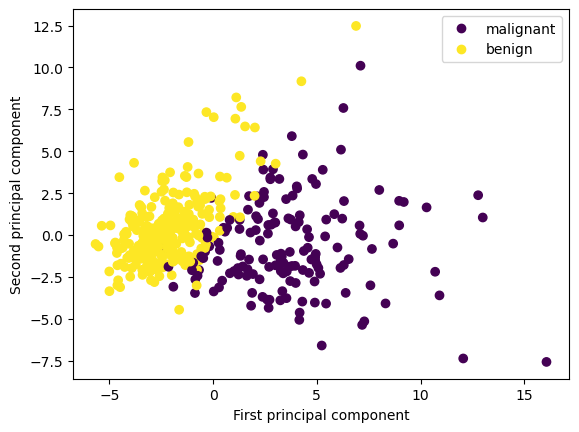

In [29]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()

Mozemo da odredimo vrednosti polaznih atributa na osnovu vrednosti novih atributa

In [30]:
pca.inverse_transform(np.random.random(size=(1,2)))

array([[-0.08011126, -0.01633835, -0.06834314, -0.07720746,  0.13603789,
         0.13971204,  0.09491506,  0.04216053,  0.13788185,  0.21628067,
        -0.01299936,  0.04724591, -0.0041222 , -0.03844154,  0.1144479 ,
         0.16910159,  0.14507589,  0.11967463,  0.10693134,  0.17699275,
        -0.06985335, -0.00846028, -0.05687898, -0.06904779,  0.12212632,
         0.1264796 ,  0.10826293,  0.05472398,  0.10337081,  0.18269127]])

## Ipak nije svemoguce

Kako je svaka glavna komponenta linearna kombinacija polaznih atributa i medjusobno su ortogonalne, na ovaj nacin redukujemo polazni visokodimenzioni prostor na linearni potprostor. Dakle, _sustinska_ dimenzionalnost nasih podataka moze biti manja od one koju pronadjemo koriscenjem PCA jer ce nam on uvek dati _linearan_ potprostor.

Npr. podaci mogu da se nalaze na povrsini sfere, sto je dvodimenziono, ali PCA ne moze da nadje 2d potprostor.

In [31]:
r = 1
n = 25
phis = np.linspace(0, 180, num=n)
thetas = np.linspace(0, 360, num=n)
x = r * np.outer(np.sin(phis), np.cos(thetas))
y = r * np.outer(np.sin(phis), np.sin(thetas))
z = r * np.outer(np.cos(phis), np.ones(n))

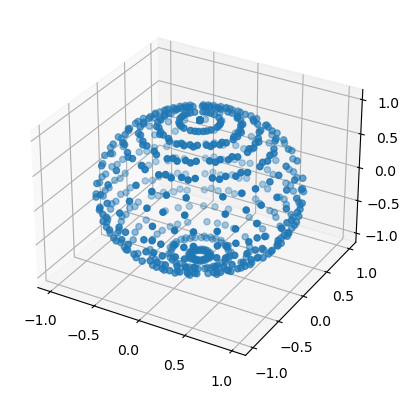

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
plt.show()

In [33]:
data = np.concatenate((x.reshape(-1,1), y.reshape(-1,1), z.reshape(-1,1)), axis=1)
data.shape

(625, 3)

In [34]:
pca = PCA()

In [35]:
pca.fit(data)

PCA()

In [36]:
pca.explained_variance_ratio_

array([0.51059861, 0.25844352, 0.23095788])

Resenje - moramo da dodamo nelinearnost, npr. (varijacioni) autoenkoderi